In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NSE-Tata_Global_Beverages_Limited.csv to NSE-Tata_Global_Beverages_Limited.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

df = pd.read_csv('NSE-Tata_Global_Beverages_Limited.csv')
print(df.head())
print(df.info())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-nu

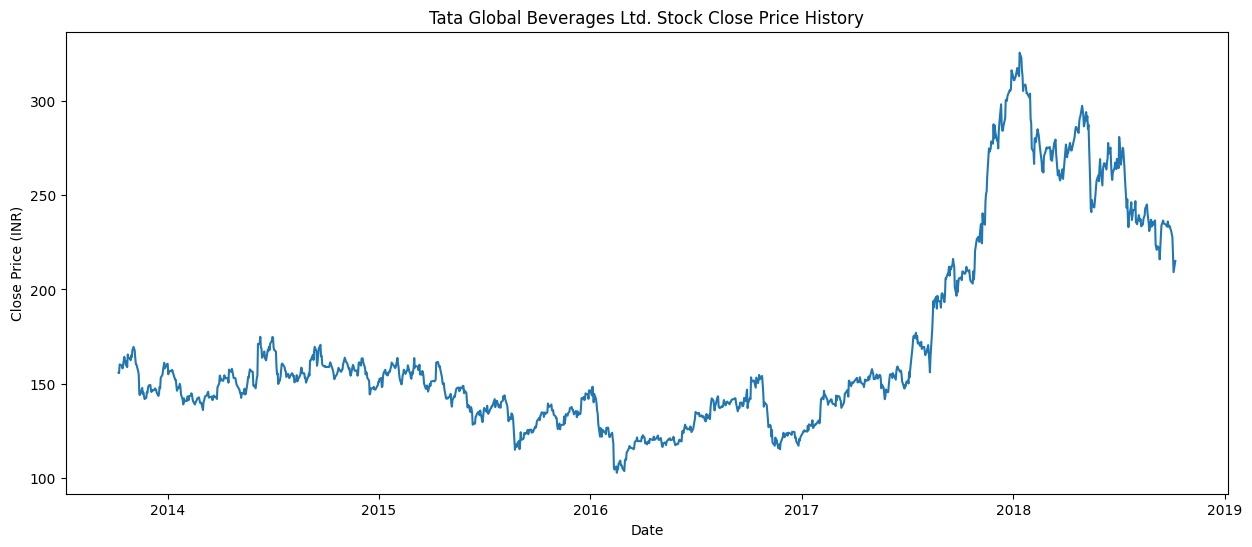

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(df['Close'])
plt.title('Tata Global Beverages Ltd. Stock Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.show()

In [ ]:
data = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=25, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0460
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0048
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0037
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0036
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0036
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0038
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0029
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0028
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0032
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0035
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0032
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0034
Epoch 13/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0034
Epoch 14/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0027
Epoch 15/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0032
Ep

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = np.sqrt(np.mean(predictions - y_test_original)**2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step
Root Mean Squared Error (RMSE): 1.1186457830884677


/tmp/ipython-input-4128509551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions.flatten()


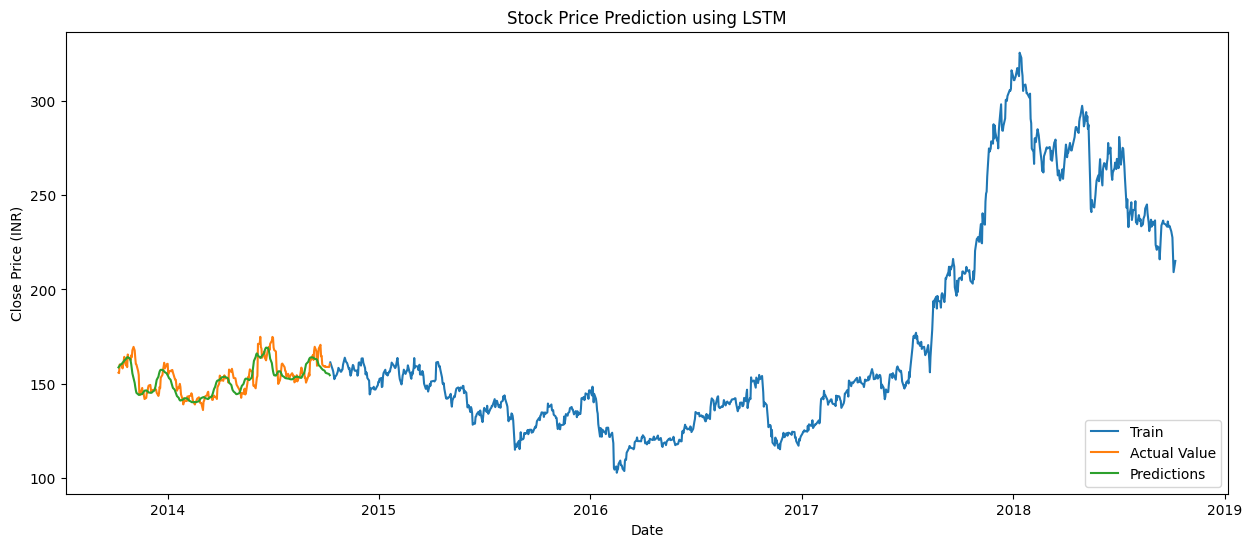

In [ ]:
train = df.iloc[:training_data_len]
valid = df.iloc[training_data_len:]
valid['Predictions'] = predictions.flatten()

plt.figure(figsize=(15, 6))
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()